In [18]:
# Cargar el archivo CSV
data = pd.read_csv('datos/train.csv')

# Mostrar las primeras filas
print(data.head())


              filename     start       end        class
0  nips4b_train001.wav  2.975057  3.172426  Petpet_song
1  nips4b_train001.wav  1.967891  2.054966  Sylcan_song
2  nips4b_train001.wav  0.856236  0.937506  Sylcan_song
3  nips4b_train001.wav  1.541224  1.674739  Sylcan_song
4  nips4b_train001.wav  1.843084  1.973696  Sylcan_song


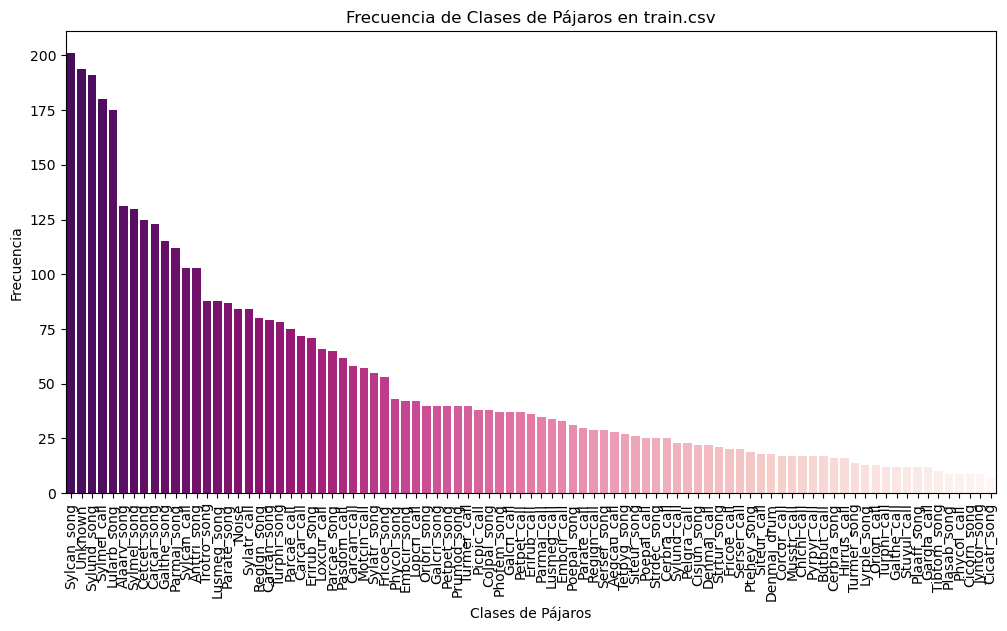

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

class_counts = data['class'].value_counts()

# Definir una paleta de colores degradados de rosas
colors = sns.color_palette("RdPu", len(class_counts))[::-1]

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))  # Ajustar el tamaño del gráfico
sns.barplot(x=class_counts.index, y=class_counts, palette=colors)
plt.xlabel('Clases de Pájaros')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Clases de Pájaros en train.csv')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()
